In [1]:
import lazyfca as fca

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

In [3]:
column_names = ['Sample code number','Clump Thickness','Uniformity of Cell Size',
        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data = 'breast-cancer-wisconsin.data'
df = pd.read_csv(data, names=column_names)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
(df['Bare Nuclei'] == '?').sum()

16

In [6]:
df = df[df['Bare Nuclei'] != '?'] #dropping rows with ? present in it

In [7]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64') #we have all the features in numerical value.

<ipython-input-7-a193dab3276c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64') #we have all the features in numerical value.


In [8]:
df = df.drop(['Sample code number'], axis=1) #since we don't need code number so dropping it from the table
#df = df.select_dtypes(exclude=['object'])
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
df.loc[df['Class'] == 2, 'Class'] = 0 #updating target labels
df.loc[df['Class'] == 4, 'Class'] = 1

In [12]:
df = df.dropna()
df.head()
cols = list(df.columns)
cols.remove('Class')
X = df.loc[:,cols]
y = df.Class
X.shape,y.shape

((683, 9), (683,))

In [13]:
X = fca.scaleing(X)

In [14]:
X.head()

,Clump Thickness_0,Clump Thickness_1,Clump Thickness_2,Clump Thickness_3,Clump Thickness_4,Uniformity of Cell Size_0,Uniformity of Cell Size_1,Uniformity of Cell Size_2,Uniformity of Cell Size_3,Uniformity of Cell Size_4,...,Normal Nucleoli_0,Normal Nucleoli_1,Normal Nucleoli_2,Normal Nucleoli_3,Normal Nucleoli_4,Mitoses_0,Mitoses_1,Mitoses_2,Mitoses_3,Mitoses_4
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,1,1,1,1,0,...,1,1,1,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [19]:
results = fca.classifier2(X_train, X_test, y_train, y_test)
results

{'tp': 58, 'fp': 1, 'tn': 132, 'fn': 14, 'contr': 0}

In [20]:
classif2 = results
accur = (classif2['tp'] + classif2['tn']) / (classif2['tp'] + classif2['tn'] + classif2['fp'] + classif2['fn'])
precision = classif2['tp'] / (classif2['tp'] + classif2['fp'])

recall = classif2['tp'] / (classif2['tp'] + classif2['fn'])
print("Aggregation function:   ")
print(" ")
print("accuracy:  ", accur*100)
print("precission:  ", precision*100)
print("recall:   ", recall*100)

Aggregation function:   
 
accuracy:   92.6829268292683
precission:   98.30508474576271
recall:    80.55555555555556


In [21]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [24]:

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Precision", "Recall", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [25]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    prec = precision_score(y_test, train_predictions)
    print("Precision: {:.4%}".format(prec))
    
    train_predictions = clf.predict(X_test)
    rec = recall_score(y_test, train_predictions)
    print("Recall: {:.4%}".format(rec))  
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    
    log_entry = pd.DataFrame([[name, acc*100, prec*100, rec*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 98.5366%
Precision: 98.5915%
Recall: 97.2222%
Log Loss: 0.20095666908018
SVC
****Results****
Accuracy: 99.0244%
Precision: 97.2973%
Recall: 100.0000%
Log Loss: 0.05096445191300711
NuSVC
****Results****
Accuracy: 99.0244%
Precision: 97.2973%
Recall: 100.0000%
Log Loss: 0.052886289747166075
DecisionTreeClassifier
****Results****
Accuracy: 96.5854%
Precision: 97.1014%
Recall: 93.0556%
Log Loss: 1.1793728525091463
RandomForestClassifier
****Results****
Accuracy: 97.0732%
Precision: 97.1429%
Recall: 94.4444%
Log Loss: 0.06245415269526508
AdaBoostClassifier
****Results****
Accuracy: 96.5854%
Precision: 97.1014%
Recall: 93.0556%
Log Loss: 0.4496309096929928
GradientBoostingClassifier
****Results****
Accuracy: 97.5610%
Precision: 97.1831%
Recall: 95.8333%
Log Loss: 0.07200628250261402
GaussianNB
****Results****
Accuracy: 96.5854%
Precision: 93.3333%
Recall: 97.2222%
Log Loss: 1.047039553059164
LinearDiscriminantAnalysis
****Results****
Accuracy: 9

d:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


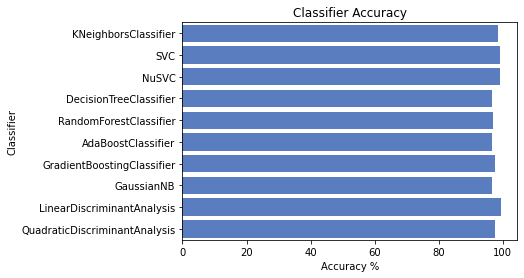

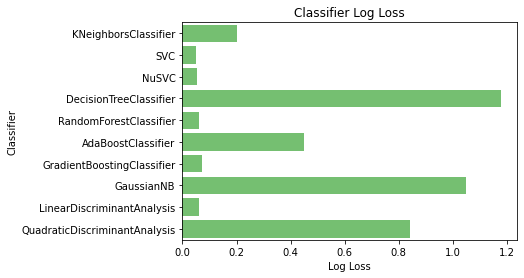

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()